In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)


In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 11s 11s/step - loss: 33469.9492
Epoch 2/300
1/1 [==============================] - 0s 31ms/step - loss: 32978.1602
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 32517.0469
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 32052.3691
Epoch 5/300
1/1 [==============================] - 0s 24ms/step - loss: 31561.1309
Epoch 6/300
1/1 [==============================] - 0s 22ms/step - loss: 31044.0156
Epoch 7/300
1/1 [==============================] - 0s 21ms/step - loss: 30497.3457
Epoch 8/300
1/1 [==============================] - 0s 25ms/step - loss: 29935.8730
Epoch 9/300
1/1 [==============================] - 0s 24ms/step - loss: 29378.2520
Epoch 10/300
1/1 [==============================] - 0s 22ms/step - loss: 28834.3594
Epoch 11/300
1/1 [==============================] - 0s 26ms/step - loss: 28308.5840
Epoch 12/300
1/1 [==============================] - 0s 22ms/step - loss: 27796.7090
E

1/1 [==============================] - 0s 6ms/step - loss: 6.3002
Epoch 103/300
1/1 [==============================] - 0s 7ms/step - loss: 5.9959
Epoch 104/300
1/1 [==============================] - 0s 7ms/step - loss: 5.6694
Epoch 105/300
1/1 [==============================] - 0s 7ms/step - loss: 5.3643
Epoch 106/300
1/1 [==============================] - 0s 6ms/step - loss: 5.0725
Epoch 107/300
1/1 [==============================] - 0s 6ms/step - loss: 4.8085
Epoch 108/300
1/1 [==============================] - 0s 7ms/step - loss: 4.5599
Epoch 109/300
1/1 [==============================] - 0s 7ms/step - loss: 4.4014
Epoch 110/300
1/1 [==============================] - 0s 8ms/step - loss: 4.2272
Epoch 111/300
1/1 [==============================] - 0s 8ms/step - loss: 4.0774
Epoch 112/300
1/1 [==============================] - 0s 8ms/step - loss: 4.0362
Epoch 113/300
1/1 [==============================] - 0s 7ms/step - loss: 3.9122
Epoch 114/300
1/1 [==============================] - 0

1/1 [==============================] - 0s 6ms/step - loss: 3.0197
Epoch 205/300
1/1 [==============================] - 0s 8ms/step - loss: 3.0574
Epoch 206/300
1/1 [==============================] - 0s 7ms/step - loss: 3.0579
Epoch 207/300
1/1 [==============================] - 0s 7ms/step - loss: 3.0012
Epoch 208/300
1/1 [==============================] - 0s 8ms/step - loss: 3.0504
Epoch 209/300
1/1 [==============================] - 0s 8ms/step - loss: 3.0261
Epoch 210/300
1/1 [==============================] - 0s 7ms/step - loss: 2.9873
Epoch 211/300
1/1 [==============================] - 0s 7ms/step - loss: 3.0338
Epoch 212/300
1/1 [==============================] - 0s 7ms/step - loss: 2.9932
Epoch 213/300
1/1 [==============================] - 0s 7ms/step - loss: 2.9740
Epoch 214/300
1/1 [==============================] - 0s 7ms/step - loss: 3.0067
Epoch 215/300
1/1 [==============================] - 0s 8ms/step - loss: 2.9620
Epoch 216/300
1/1 [==============================] - 0

In [14]:
from array import array

In [17]:
# demonstrate prediction for next 10 days

x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.3558]
1 day input [196.         210.         223.35580444]
1 day output [[234.06503]]
2 day input [210.         223.35580444 234.06503296]
2 day output [[246.8107]]
3 day input [223.3558  234.06503 246.8107 ]
3 day output [[259.0723]]
4 day input [234.06503 246.8107  259.0723 ]
4 day output [[270.4845]]
5 day input [246.8107 259.0723 270.4845]
5 day output [[282.8073]]
6 day input [259.0723 270.4845 282.8073]
6 day output [[294.85367]]
7 day input [270.4845  282.8073  294.85367]
7 day output [[306.71362]]
8 day input [282.8073  294.85367 306.71362]
8 day output [[319.01834]]
9 day input [294.85367 306.71362 319.01834]
9 day output [[331.2288]]
[223.3558, 234.06503, 246.8107, 259.0723, 270.4845, 282.8073, 294.85367, 306.71362, 319.01834, 331.2288]


In [18]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [19]:
len(timeseries_data)

9

In [20]:
lst_output

[223.3558,
 234.06503,
 246.8107,
 259.0723,
 270.4845,
 282.8073,
 294.85367,
 306.71362,
 319.01834,
 331.2288]

In [22]:
import matplotlib.pyplot as plt

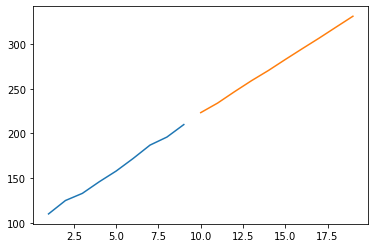

In [23]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)